In [1]:
##### Packages required #####
import numpy as np
import pandas as pd
from scipy import interp
import matplotlib.pyplot as plt
##### Sampling Package #####
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
##### ROC Curve Requirements #####
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
##### Machine Learning Models #####
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
##### Datasets #####
##### Path to datasets #####
pathin = "/Users/kotapatitejavenkatpawan/Desktop/Project Documents/DATA/Data_5_(data sets for ML)/"
##### Breast Cancer Data #####
breast = pd.DataFrame(pd.read_csv(pathin + "breast_spr.csv"))
##### Colon & Rectal Cancer Data #####
colrect = pd.DataFrame(pd.read_csv(pathin + "colrect_spr.csv"))
##### Digestive & Thoracic Cancer Data #####
digothr = pd.DataFrame(pd.read_csv(pathin + "digothr_spr.csv"))
##### Female Genital Cancer Data #####
femgen = pd.DataFrame(pd.read_csv(pathin + "femgen_spr.csv"))
##### Male Genital Cancer Data #####
malegen = pd.DataFrame(pd.read_csv(pathin + "malegen_spr.csv"))
##### Respiratory Cancer Data #####
respir = pd.DataFrame(pd.read_csv(pathin + "respir_spr.csv"))
##### Urinary Cancer Data #####
urinary = pd.DataFrame(pd.read_csv(pathin + "urinary_spr.csv"))
##### Creating a list for the data sets useful in running FOR-LOOP
data = [breast, colrect, digothr, femgen, malegen, respir, urinary]
#data_set = ["breast", "colrect", "digothr", "femgen", "malegen", "respir", "urinary"]

In [3]:
##### ML Model #####
##### Stratified 10-fold Cross Validation #####
skf=StratifiedKFold(n_splits=10, shuffle=False)
##### Decision Tree Gini Index #####
clf_gini = DecisionTreeClassifier(criterion = "gini", min_samples_leaf=20)
##### Decision Tree Entropy #####
clf_entropy = DecisionTreeClassifier(criterion = "entropy", min_samples_leaf=10)
##### Logistic Regression #####
log_reg = LogisticRegression(max_iter=10000)
##### Naive bayes #####
naive_bayes= GaussianNB()
##### Support vector Machine #####
svm = LinearSVC(dual=False, max_iter=10000)
##### Random Forest Gini Index #####
rnd_clf_gini = RandomForestClassifier(criterion='gini', n_estimators=500, max_leaf_nodes=1000, n_jobs=-1)
##### Random Forest Entropy #####
rnd_clf_entropy = RandomForestClassifier(criterion='entropy', n_estimators=100, max_leaf_nodes=1000, n_jobs=-1)
##### Multi Layer Perceptron #####
mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(10,10), max_iter=10000)
##### Creating a list of Machine learning Models useful in running FOR-LOOP
model=[clf_gini, clf_entropy, log_reg, naive_bayes, svm, rnd_clf_gini, rnd_clf_entropy, mlp]
#mlmodel=["Decision_Tree_gini", "Decision_Tree_entropy", "Logistic_Regression", "Naive_Bayes", 
        #"Support_Vector_Machine", "Random_Forest_gini", "Random_Forest_entropy", "Multi_Layer_Perceptron"]
##### printing Model Parameters #####

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Sensitivity: 0.9795298582859404
Accuracy: 0.9257436656750218
Specificity: 0.3956388133790332
Precision: 0.9410861644368276
F1_score: 0.959923260432703


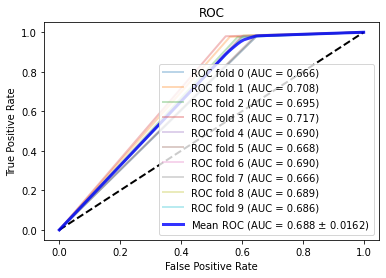

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Sensitivity: 0.9712884377276584
Accuracy: 0.9194317956031932
Specificity: 0.40834416735610446
Precision: 0.9417917129352396
F1_score: 0.9563126784884107


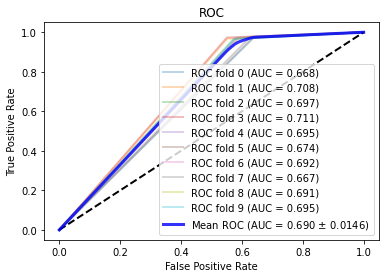

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Sensitivity: 0.9882929256893084
Accuracy: 0.9267017416841996
Specificity: 0.3196726155300792
Precision: 0.9347140033855149
F1_score: 0.9607570551324759


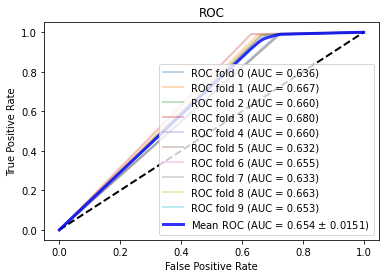

GaussianNB(priors=None, var_smoothing=1e-09)
Sensitivity: 0.7664760956832225
Accuracy: 0.7662457846016499
Specificity: 0.7639758893747784
Precision: 0.9697026015254899
F1_score: 0.856195119990891


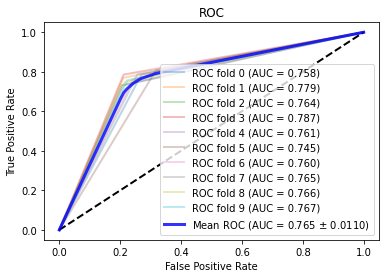

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Sensitivity: 0.9932755524509906
Accuracy: 0.9254333796947766
Specificity: 0.2567958870109916
Precision: 0.9294384644948088
F1_score: 0.9602972632994603


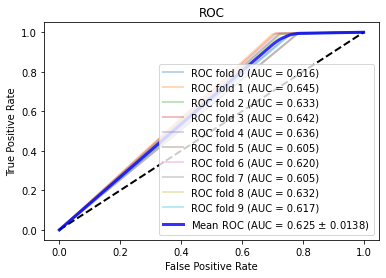

In [ ]:
##### No Sampling Technique #####
for data in data:
    #Splitting Dataset into dependent & independent variable
    #below condition only satisfies only if dependent/class variable is present as last column
    X = data.values[:,:-1]
    Y = data.values[:, -1]
    for mlmodel in model:
        nrl_confusion_matrix=[]
        tprs = []
        aucs = []
        mean_fpr = np.linspace(0,1,100)
        i = 0
        ##### Train model, Predict, ROC curve #####
        for train_index, test_index in skf.split(X,Y):
            X_train, X_test, Y_train, Y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
            mlmodel = mlmodel.fit(X_train, Y_train)
            Y_pred= mlmodel.predict(X_test)
            nrl_confusion_matrix.append(confusion_matrix(Y_test, Y_pred))
            fpr, tpr, t = roc_curve(Y_test, Y_pred)
            tprs.append(interp(mean_fpr, fpr, tpr))
            roc_auc = auc(fpr, tpr)
            aucs.append(roc_auc)
            plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.3f)' % (i, roc_auc))
            i= i+1
        std_tpr = np.std(tprs, axis=0)
        mean_tpr = np.mean(tprs, axis=0)
        tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
        tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
        std_auc = np.std(aucs)
        plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
        mean_auc = auc(mean_fpr, mean_tpr)
        plt.plot(mean_fpr, mean_tpr, color='blue',
                 label=r'Mean ROC (AUC = %0.3f $\pm$ %0.4f)' % (mean_auc, std_auc),lw=3, alpha=.8)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC')
        plt.legend(loc="lower right")
        nrl_matrix_score=np.sum(nrl_confusion_matrix, axis=0)
        ##### Metrics Calculation #####
        print(mlmodel)
        [[TN, FP],[FN, TP]]=nrl_matrix_score
        Sensitivity = TP/(TP+FN) # Sensitivity, hit rate, recall, or true positive rate
        Specificity = TN/(TN+FP) # Specificity or true negative rate
        Accuracy = (TP+TN)/(TP+TN+FP+FN) #Accuracy
        Precision = TP/(TP+FP) # Precision or positive predictive value
        F1_score= 2*TP/(2*TP+FP+FN) # F1 Score
        print('Sensitivity:', Sensitivity)
        print('Accuracy:', Accuracy)
        print('Specificity:', Specificity)
        print('Precision:', Precision)
        print('F1_score:', F1_score)
        plt.show()

In [ ]:
##### Over Sampling Technique #####
for data in data:
    #Splitting Dataset into dependent & independent variable
    #below condition only satisfies only if dependent/class variable is present as last column
    X = data.values[:,:-1]
    Y = data.values[:, -1]
    for mlmodel in model:
        nrl_confusion_matrix=[]
        tprs = []
        aucs = []
        mean_fpr = np.linspace(0,1,100)
        i = 0
        ##### Train model, Predict, ROC curve #####
        for train_index, test_index in skf.split(X,Y):
            X_train, X_test, Y_train, Y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
            ros = RandomOverSampler()
            X_train_ovr, Y_train_ovr = ros.fit_sample(X_train, Y_train)
            mlmodel = mlmodel.fit(X_train_ovr, Y_train_ovr)
            Y_pred= mlmodel.predict(X_test)
            nrl_confusion_matrix.append(confusion_matrix(Y_test, Y_pred))
            fpr, tpr, t = roc_curve(Y_test, Y_pred)
            tprs.append(interp(mean_fpr, fpr, tpr))
            roc_auc = auc(fpr, tpr)
            aucs.append(roc_auc)
            plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.3f)' % (i, roc_auc))
            i= i+1
        std_tpr = np.std(tprs, axis=0)
        mean_tpr = np.mean(tprs, axis=0)
        tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
        tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
        std_auc = np.std(aucs)
        plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
        mean_auc = auc(mean_fpr, mean_tpr)
        plt.plot(mean_fpr, mean_tpr, color='blue',
                 label=r'Mean ROC (AUC = %0.3f $\pm$ %0.4f)' % (mean_auc, std_auc),lw=3, alpha=.8)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC')
        plt.legend(loc="lower right")
        nrl_matrix_score=np.sum(nrl_confusion_matrix, axis=0)
        ##### Metrics Calculation #####
        print(mlmodel)
        [[TN, FP],[FN, TP]]=nrl_matrix_score
        Sensitivity = TP/(TP+FN) # Sensitivity, hit rate, recall, or true positive rate
        Specificity = TN/(TN+FP) # Specificity or true negative rate
        Accuracy = (TP+TN)/(TP+TN+FP+FN) #Accuracy
        Precision = TP/(TP+FP) # Precision or positive predictive value
        F1_score= 2*TP/(2*TP+FP+FN) # F1 Score
        print('Sensitivity:', Sensitivity)
        print('Accuracy:', Accuracy)
        print('Specificity:', Specificity)
        print('Precision:', Precision)
        print('F1_score:', F1_score)
        plt.show()

In [ ]:
##### Under Sampling Technique #####
for data in data:
    #Splitting Dataset into dependent & independent variable
    #below condition only satisfies only if dependent/class variable is present as last column
    X = data.values[:,:-1]
    Y = data.values[:, -1]
    for mlmodel in model:
        nrl_confusion_matrix=[]
        tprs = []
        aucs = []
        mean_fpr = np.linspace(0,1,100)
        i = 0
        ##### Train model, Predict, ROC curve #####
        for train_index, test_index in skf.split(X,Y):
            X_train, X_test, Y_train, Y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
            rus = RandomUnderSampler()
            X_train_udr, Y_train_udr = rus.fit_sample(X_train, Y_train)
            mlmodel = mlmodel.fit(X_train_udr, Y_train_udr)
            Y_pred= mlmodel.predict(X_test)
            nrl_confusion_matrix.append(confusion_matrix(Y_test, Y_pred))
            fpr, tpr, t = roc_curve(Y_test, Y_pred)
            tprs.append(interp(mean_fpr, fpr, tpr))
            roc_auc = auc(fpr, tpr)
            aucs.append(roc_auc)
            plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.3f)' % (i, roc_auc))
            i= i+1
        std_tpr = np.std(tprs, axis=0)
        mean_tpr = np.mean(tprs, axis=0)
        tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
        tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
        std_auc = np.std(aucs)
        plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
        mean_auc = auc(mean_fpr, mean_tpr)
        plt.plot(mean_fpr, mean_tpr, color='blue',
                 label=r'Mean ROC (AUC = %0.3f $\pm$ %0.4f)' % (mean_auc, std_auc),lw=3, alpha=.8)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC')
        plt.legend(loc="lower right")
        nrl_matrix_score=np.sum(nrl_confusion_matrix, axis=0)
        ##### Metrics Calculation #####
        print(mlmodel)
        [[TN, FP],[FN, TP]]=nrl_matrix_score
        Sensitivity = TP/(TP+FN) # Sensitivity, hit rate, recall, or true positive rate
        Specificity = TN/(TN+FP) # Specificity or true negative rate
        Accuracy = (TP+TN)/(TP+TN+FP+FN) #Accuracy
        Precision = TP/(TP+FP) # Precision or positive predictive value
        F1_score= 2*TP/(2*TP+FP+FN) # F1 Score
        print('Sensitivity:', Sensitivity)
        print('Accuracy:', Accuracy)
        print('Specificity:', Specificity)
        print('Precision:', Precision)
        print('F1_score:', F1_score)
        plt.show()